# Семинар 7
# Симплекс-метод. Табличная реализация

In [2]:
from scipy.optimize import linprog
import scipy

### Ниже приведен пример, демострирующий работу solver(а) (использующий в качестве алгоритма симплекс-метод) scipy.optimize.linprog 



\begin{equation}
  \begin{split}
    & \min_x c^{\top}x \\
    \text{s.t. } & Ax \leq b\\
    & x_2 \geq -3,
  \end{split}
\end{equation}
где
\begin{equation}
A = \begin{pmatrix}
    -3       & 1\\
    1      & 2
\end{pmatrix}, \;\;\;
b = \begin{pmatrix} 6 \\ 4\end{pmatrix}, \;\;\;
c = \begin{pmatrix} -1 \\ 4\end{pmatrix}
\end{equation}


In [8]:
c = [-1, 4]
A = [[-3, 1], [1, 2]]
b = [6, 4]
x0_bounds = (0, None)
x1_bounds = (-3, None)
res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds],
              options={"disp": True}, method='simplex', callback=scipy.optimize.linprog_verbose_callback)

--------- Iteration 0  ---------

--------- Iteration 1  ---------

Current Pseudo-Objective Value:
f =  8.0

Current Solution Vector:
x =  [      0.0000       2.0000]

--------- Simplex Complete --------

Iterations required: 2
Current Pseudo-Objective Value:
f =  8.0

Current Solution Vector:
x =  [      0.0000       2.0000]

--------- Iteration 2  ---------

Current Objective Value:
f =  8.0

Current Solution Vector:
x =  [      0.0000       2.0000]

--------- Simplex Complete --------

Iterations required: 3
Current Objective Value:
f =  -22.0

Current Solution Vector:
x =  [     10.0000      -3.0000]

Optimization terminated successfully.
         Current function value: -22.000000  
         Iterations: 3


## Задача 1 (табличная реализация симплекс-метода)

\begin{equation}
  \begin{split}
    & \min_x c^{\top}x \\
    \text{s.t. } & Ax \leq b\\
    & x_i \geq 0,
  \end{split}
\end{equation}
где
\begin{equation}
A = \begin{pmatrix}
    1 & 2 & 2\\
    2 & 1 & 2\\
    2 & 2 & 1
\end{pmatrix}, \;\;\;
b = \begin{pmatrix} 20 \\ 20 \\ 20 \end{pmatrix}, \;\;\;
c = \begin{pmatrix} -10 \\ -12 \\ -12 \end{pmatrix}
\end{equation}


После запуска функции linprog можно заметить, что решение данной задачи является:
\begin{equation} f(x^*) = -136,\;\;\;  x^* = \begin{pmatrix} 4 \\ 4 \\ 4 \end{pmatrix}
\end{equation}

In [9]:
c = [-10, -12, -12]
A = [[1, 2, 2], [2, 1, 2], [2, 2, 1]]
b = [20, 20, 20]
x0_bounds = (0, None)
x1_bounds = (0, None)
x2_bounds = (0, None)
res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds, x2_bounds],
              options={"disp": True}, method='simplex', callback=scipy.optimize.linprog_verbose_callback)

--------- Iteration 0  ---------

--------- Iteration 1  ---------

Current Pseudo-Objective Value:
f =  -100.0

Current Solution Vector:
x =  [     10.0000       0.0000       0.0000]

--------- Iteration 2  ---------

Current Pseudo-Objective Value:
f =  -100.0

Current Solution Vector:
x =  [     10.0000       0.0000       0.0000]

--------- Simplex Complete --------

Iterations required: 3
Current Pseudo-Objective Value:
f =  -136.0

Current Solution Vector:
x =  [      4.0000       4.0000       4.0000]

--------- Simplex Complete --------

Iterations required: 3
Current Objective Value:
f =  -136.0

Current Solution Vector:
x =  [      4.0000       4.0000       4.0000]

Optimization terminated successfully.
         Current function value: -136.000000 
         Iterations: 3


Теперь получим этот же результат, используя табличную реализацию сиплекс-метода. 

По постановке задачи видно, что она не в стандартной форме. Введем дополнительные переменные для записи исходной задачи в стандартной форме:




\begin{equation}
  \begin{split}
    & \min_x -10 x_1 -12 x_2 -12 x_3\\
    \text{s.t. } & x_1 + 2x_2+ 2x_3 + x_4 = 20\\
    & 2 x_1 +  x_2 + 2x_3 + x_5 = 20\\
    & 2x_1 + 2x_2 + x_3 + x_6 = 20\\
    & x_{1,2,3,4,5,6} \geq 0
  \end{split}
\end{equation}

Далее нужно найти угловую точку допустимого множества, т.е. такую угловую точку, чтобы она лежала в множестве и существовало множество индексов (в дальнейшем будем называть "базис") $B ⊂ \{1 ,..., n \}$, что матрица $A_B$ была невырождена, и координаты угловой точки с индексами не из базиса $B$ были нулевыми.

В данном примере легко увидеть, что $x_0^T = (0,0,0,20,20,20), B_0 = \{ 4,5,6 \}$ и матрица $A_B = I_m$-- невырождена. В случае, если начальная точка не очевидна, следует воспользоваться двухфазным методом или М-методом (см. Задачу 3).  

Теперь составим таблицу симплекс-метода, модифицируя которую получим решения исходной задачи. В первой строке первого столбца расположено значение целевой функции, а в остальных столбцах этой строки оценки замещения для каждой переменной (по ним будем проверять оптимальность базиса). Начиная со второй строки в первом столбце расположены базисные переменные (БП) и их значения, а остальные столбцы соответствуют столбцам матрицы $A$. 

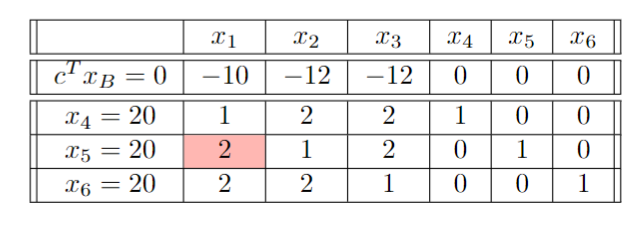

Из первой строки (оценки замещения) видно, что есть отрицательные элементы. Следовательно текущий базис не является оптимальным и нужно заменить базис. Тогда выберем столбец оценка замещения (элемент из первой строки) которого отрицателен и индекс которого минимален. Столбец координаты $x_1$ подходит, поэтому новый элемент базиса будет индекс "1". 

Теперь необходимо выбрать какой элемент базиса заменить, для этого воспользуемся правилом ***Блэнда***:

1.   **(Какой элемент добавляем в базис)** Выбираем небазисный столбец с наименьшим индексом (т.е. самый левый) с отрицательной оценкой замещения. 
2.   **(Какой элемент убираем из базиса)** Среди всех строк выбираем ту, для которой достигается минимум отношения значения базисной переменной (ЗБП) и коэффициента (КФ) вводимого столбца в таблице при условии, что этот коэффициент больше нуля. Если такой минимум достигается на нескольких строках, выбираем строку, соответствующую столбцу (переменной) с наименьшим индексом.

Применяя первый пункт из правила Блэнда мы действительно получим, что первый индекс будет новым индексом в базисе. Теперь подробнее остановимся на выборе индекса, который будем заменять. По второму пункту правила Блэнда выпишим значения отношений по строчно:

*   Первая строка (БП: $x_4$, ЗБП = 20) $\;\;\; 1 > 0 ⇒ \;\;\;\frac{20}{1} = 20$
*   Вторая строка (БП: $x_5$, ЗБП = 20) $\;\;\; 2 > 0 ⇒ \;\;\;\frac{20}{2} = 10$
*   Третья строка (БП: $x_6$, ЗБП = 20) $\;\;\; 2 > 0 ⇒ \;\;\;\frac{20}{2} = 10$

Следовательно минимальное отношение достигается на базисных переменных $x_5$ и $x_6$. Пользуясь тем же правилом Блэнда, выберем индекс "5" и соответсвенно базисную переменную $x_5$. Таким образом, выбран ведущий элемент равный 2 (в таблице выделен цветом).

Далее с помощью элементарных преобразований получим базисную матрицу для новой угловой точки с базисом $B_1 = \{1, 4, 6 \}$. 

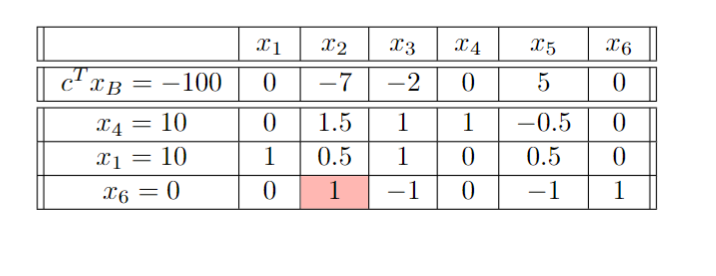

Следующим шагом выбираем столбец $x_2$, поскольку оценка замещения отрицательная и индекс минимален ($2<3$). Аналогично с предыдущей итерации выберем индекс "6" в качестве индекса, который будем заменять:

*   Первая строка (БП: $x_4$, ЗБП = 10) $\;\;\; 1.5 > 0 ⇒ \;\;\;\frac{10}{1.5} = \frac{20}{3} $
*   Вторая строка (БП: $x_1$, ЗБП = 10) $\;\;\; 0.5 > 0 ⇒ \;\;\;\frac{10}{0.5} = 20$
*   Третья строка (БП: $x_6$, ЗБП = 0) $\;\;\; 1 > 0 ⇒ \;\;\;\frac{0}{1} = 0$

Следовательно минимальное отношение достигается на базисной переменной $x_6$, поэтому выберем индекс "6". Таким образом, выбран ведущий элемент равный 1 (в таблице выделен цветом).

Далее с помощью элементарных преобразований получим базисную матрицу для новой угловой точки с базисом $B_2 = \{1, 2, 4 \}$. 

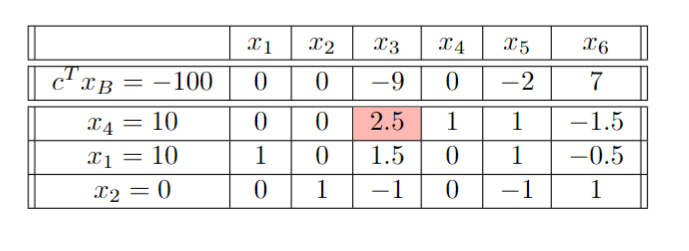

Следующим шагом по правилу Блэнда выбор падает на столбец $x_3$. Далее аналогично проделаем действия по выбору строки:

*   Первая строка (БП: $x_4$, ЗБП = 10) $\;\;\; 2.5 > 0 ⇒ \;\;\;\frac{10}{2.5} = 4 $
*   Вторая строка (БП: $x_1$, ЗБП = 10) $\;\;\; 1.5 > 0 ⇒ \;\;\;\frac{10}{1.5} = \frac{20}{3}$
*   Третья строка (БП: $x_2$, ЗБП = 0) $\;\;\; -1 < 0 $

Так как $4 < \frac{20}{3}$, то убираем из базиса индекс "4". Построим преобразованную таблицу с новым базисом $B_3 = \{ 1, 2, 3 \}$.

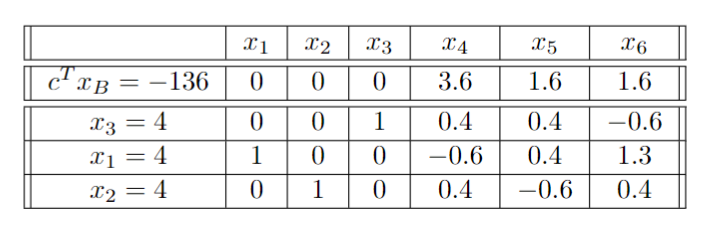

Так как все оценки замещения неотрицательны, то решение найдено и оно является оптимальным. Найденное решение исходной задачи $(x^*)^T = (x_1, x_2, x_3) = (4, 4, 4)$, а оптимальное значение $f(x^*) = -136$.

Не трудно заметить, что ответы сошлись с решением "солвера" *linprog*, более того, ещё сошлось количество проделанных итераций.

## Задача 2 (табличная реализация симплекс-метода)

Решите табличным симплекс-методом самостоятельно следующее задание:

\begin{equation}
  \begin{split}
    & \max_x c^{\top}x \\
    \text{s.t. } & Ax \leq b\\
    & x_i \geq 0,
  \end{split}
\end{equation}
где
\begin{equation}
A = \begin{pmatrix}
    2 & 3 & 6\\
    4 & 2 & 4\\
    4 & 6 & 8
\end{pmatrix}, \;\;\;
b = \begin{pmatrix} 240 \\ 200 \\ 160 \end{pmatrix}, \;\;\;
c = \begin{pmatrix} 4 \\ 5 \\ 4 \end{pmatrix}
\end{equation}


In [10]:
c = [-4, -5, -4]
A = [[2, 3, 6], [4, 2, 4], [4, 6, 8]]
b = [240, 200, 160]
x0_bounds = (0, None)
x1_bounds = (0, None)
x2_bounds = (0, None)
res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds, x2_bounds],
              options={"disp": True}, method='simplex', callback=scipy.optimize.linprog_verbose_callback)

--------- Iteration 0  ---------

--------- Iteration 1  ---------

Current Pseudo-Objective Value:
f =  -80.0

Current Solution Vector:
x =  [      0.0000       0.0000      20.0000]

--------- Iteration 2  ---------

Current Pseudo-Objective Value:
f =  -160.0

Current Solution Vector:
x =  [     40.0000       0.0000       0.0000]

--------- Iteration 3  ---------

Current Pseudo-Objective Value:
f =  -160.0

Current Solution Vector:
x =  [     40.0000       0.0000       0.0000]

--------- Simplex Complete --------

Iterations required: 4
Current Pseudo-Objective Value:
f =  -160.0

Current Solution Vector:
x =  [     40.0000       0.0000       0.0000]

--------- Simplex Complete --------

Iterations required: 4
Current Objective Value:
f =  -160.0

Current Solution Vector:
x =  [     40.0000       0.0000       0.0000]

Optimization terminated successfully.
         Current function value: -160.000000 
         Iterations: 4


## Задача 3 (Двухфазный симплекс-метод / M-метод)

#### **М-метод**

Основная идея состоит в объединении двух фаз симплекс-метода в одну фазу.

\begin{equation}
  \begin{split}
    & \min_{x,\xi} c^T x + M (\xi_1 + ... + \xi_m) \\
    \text{s.t. } & Ax + \xi = b \\
    & x \geq 0, \xi \geq 0
  \end{split}
\end{equation}

где **M** -- произвольное большое положительное число.

### Задача 3

\begin{equation}
  \begin{split}
    & \min x_1 + x_2 + x_3\\
    \text{s.t. } & x_1 + 2x_2+ 3x_3 = 3\\
    & -x_1 + 2x_2 + 6x_3 = 2\\
    & 4x_2 + 9x_3 = 5\\
    & 3x_3 + x_4 = 1\\
    & x_{1,2,3,4} \geq 0
  \end{split}
\end{equation}

In [11]:
# Правило Блэнда
c = [1, 1, 1, 0]
A = [[1, 2, 3, 0], [-1, 2, 6, 0], [0, 4, 9, 0], [0, 0, 3, 1]]
b = [3, 2, 5, 1]
x0_bounds = (0, None)
x1_bounds = (0, None)
x2_bounds = (0, None)
x3_bounds = (0, None)
res = linprog(c, A_eq=A, b_eq=b, bounds=[x0_bounds, x1_bounds, x2_bounds, x3_bounds],
              options={"disp": True}, method='simplex', callback=scipy.optimize.linprog_verbose_callback)

--------- Iteration 0  ---------

--------- Iteration 1  ---------

Current Pseudo-Objective Value:
f =  0.3333333333333333

Current Solution Vector:
x =  [      0.0000       0.0000       0.3333       0.0000]

--------- Iteration 2  ---------

Current Pseudo-Objective Value:
f =  0.3333333333333333

Current Solution Vector:
x =  [      0.0000       0.0000       0.3333       0.0000]

--------- Simplex Complete --------

Iterations required: 3
Current Pseudo-Objective Value:
f =  1.8333333333333333

Current Solution Vector:
x =  [      1.0000       0.5000       0.3333       0.0000]

--------- Iteration 3  ---------

Current Objective Value:
f =  1.8333333333333333

Current Solution Vector:
x =  [      1.0000       0.5000       0.3333       0.0000]

--------- Simplex Complete --------

Iterations required: 4
Current Objective Value:
f =  1.75

Current Solution Vector:
x =  [      0.5000       1.2500       0.0000       1.0000]

Optimization terminated successfully.
         Current functio

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  # Remove the CWD from sys.path while we load stuff.


#### **М-метод**

Для нахождения добустимого базиса составим вспомогательную задачу: 

\begin{equation}
  \begin{split}
    & \min x_1 + x_2 + x_3 + M(x_5 + x_6 + x_7 + x_8)\\
    \text{s.t. } & x_1 + 2x_2+ 3x_3 + x_5 = 3\\
    & -x_1 + 2x_2 + 6x_3 + x_6 = 2\\
    & 4x_2 + 9x_3 + x_7 = 5\\
    & 3x_3 + x_4 + x_8 = 1\\
    & x_{1,...,8} \geq 0
  \end{split}
\end{equation}

##### Таблицы (Фаза 1):

Начальная угловая точка для вспомогательной задачи очивидна, $x_0^T = (0,0,0,0, 3,2,5,1)$. Чтобы заполнить строку с оценками замещения, выразим $x_5, ..., x_8$ через $x_1, ..., x_4$ из ограничений. Получится $x_1 (1 + M \cdot 0) + x_2 (1 + M  \cdot (-8)) + x_3 (1 + M \cdot (-21)) + x_4 (M  \cdot (-1))$.  Учитывая, что коэффициент $M$ большое положительное число, заполним таблицу. Далее во всех таблицах выделены жирным шрифтом ведущие элементы.

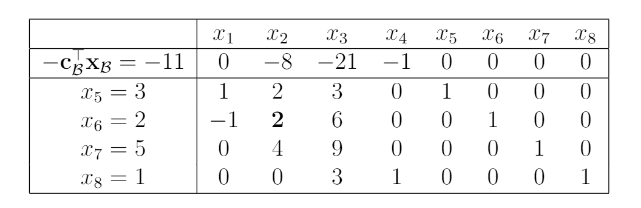

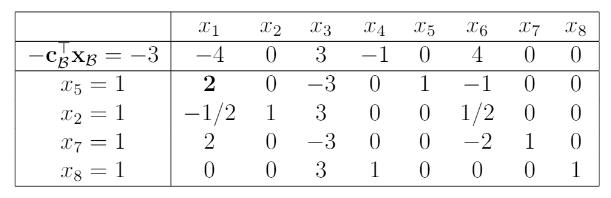

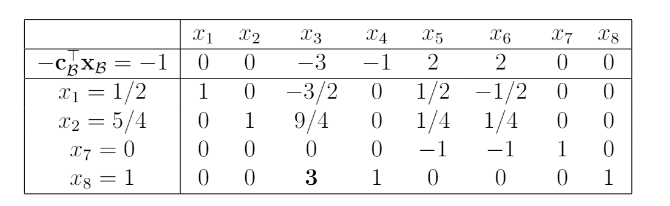

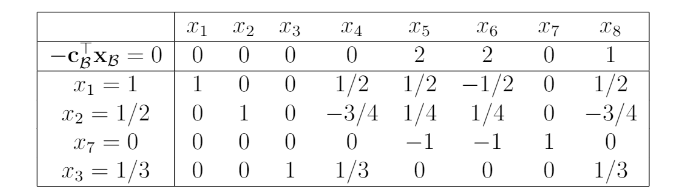

##### Таблицы (Фаза 2):

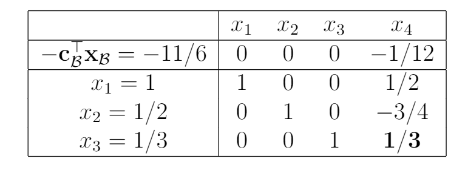

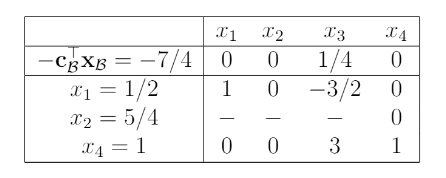

## Тренировка


\begin{equation}
  \begin{split}
    & \min_x c^{\top}x \\
    \text{s.t. } & Ax \leq b\\
    & x_i \geq 0,
  \end{split}
\end{equation}
где
\begin{equation}
A = \begin{pmatrix}
    6 & 6\\
    4 & 8 
\end{pmatrix}, \;\;\;
b = \begin{pmatrix} 36 \\ 32 \end{pmatrix}, \;\;\;
c = \begin{pmatrix} -3 \\ 4 \end{pmatrix}
\end{equation}
